#  Setting up

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and Preprocess the Dataset

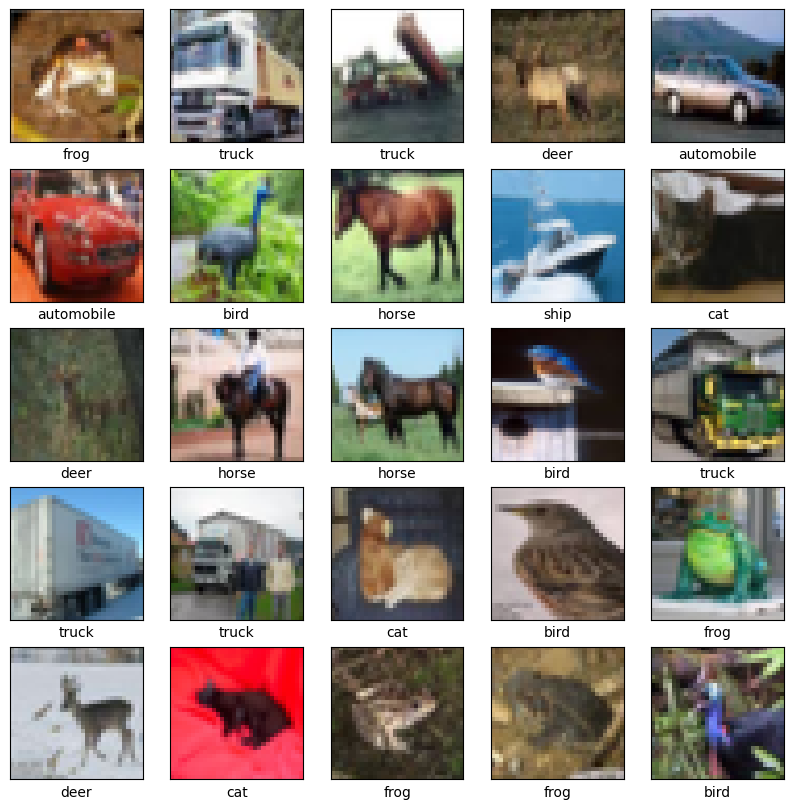

In [2]:
# load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values to be between 0 & 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# display the first few images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


# Build the CNN Model

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


C:\Users\aaish\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and Train the Model

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model with early stopping
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stopping])



Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.3451 - loss: 1.7702 - val_accuracy: 0.5625 - val_loss: 1.2051
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5803 - loss: 1.1826 - val_accuracy: 0.6171 - val_loss: 1.0807
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6488 - loss: 1.0028 - val_accuracy: 0.6615 - val_loss: 0.9641
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6828 - loss: 0.8935 - val_accuracy: 0.6856 - val_loss: 0.9056
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7082 - loss: 0.8257 - val_accuracy: 0.6976 - val_loss: 0.8852
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 32ms/step - accuracy: 0.7384 - loss: 0.7534 - val_accuracy: 0.7014 - val_loss: 0.8850
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 26ms/step - accuracy: 0.7498 - loss: 0.7055 - val_accuracy: 0.7090 - val_loss: 0.8522
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7722 -

# Evaluate the Model

313/313 - 2s - 5ms/step - accuracy: 0.7090 - loss: 0.8522
Test accuracy: 0.7089999914169312


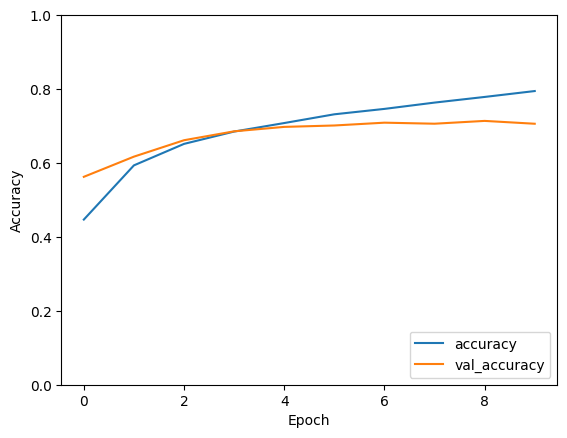

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


# Make Predictions and Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


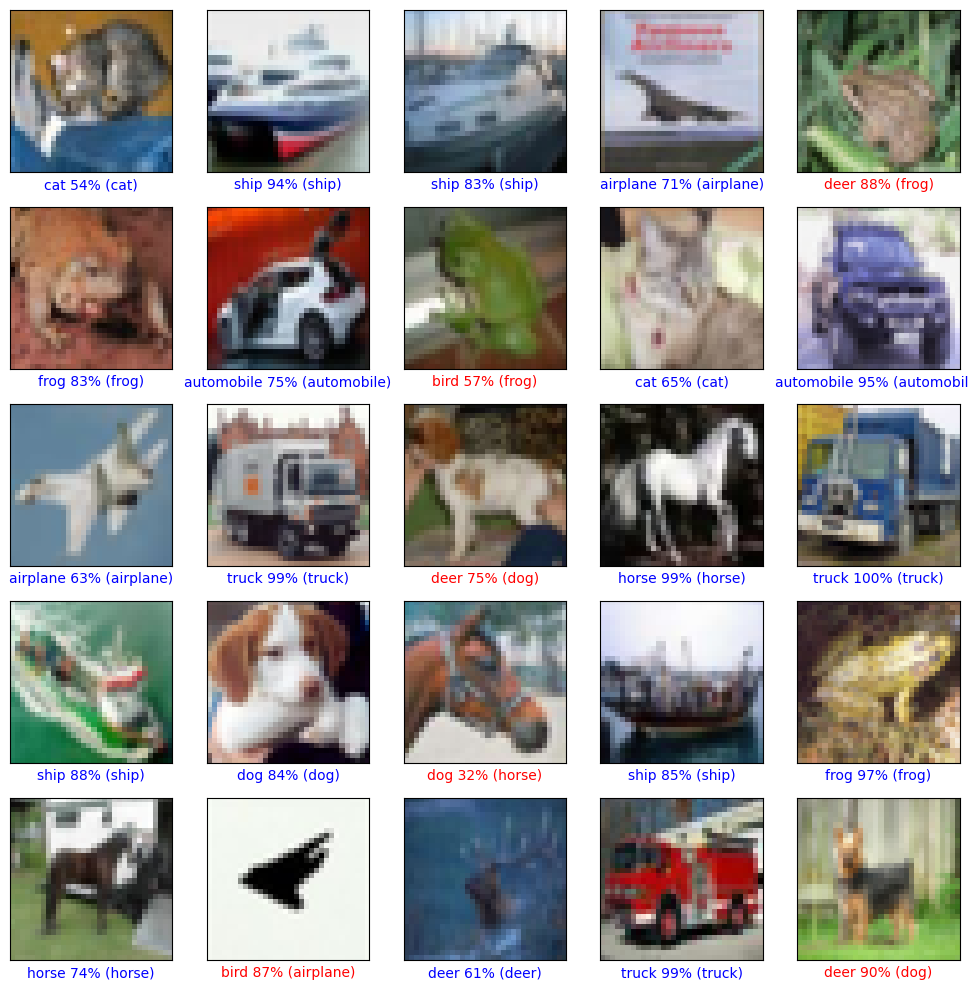

In [6]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# function to plot the image and predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label[0]]),
                                  color=color)

# plot some predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()
